# Project name -->   Station Demand Predictor

####  Building Linear Rregression model Using  RandomForestRegressor

##### impoting requred libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score 
import seaborn as sns
%matplotlib inline

##### Data Exploring

In [2]:
file_path = r"C:\Users\Ravichandran\OneDrive\Desktop\202410-capitalbikeshare-tripdata.csv"
bike_data = pd.read_csv(file_path)
bike_data  = bike_data.copy()

In [3]:
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,22A1DDC3809CB735,electric_bike,2024-10-22 13:43:04.624,2024-10-22 13:56:10.009,NaN,NaN,Wisconsin Ave & Newark St NW,31302.0,38.940000,-77.090000,38.934881,-77.072755,casual
1,320A39BFD5BA1F06,electric_bike,2024-10-22 19:22:01.551,2024-10-22 19:28:40.125,Wisconsin Ave & Newark St NW,31302.0,NaN,NaN,38.934881,-77.072755,38.950000,-77.070000,casual
2,EA1516B005A54187,electric_bike,2024-10-22 11:29:04.466,2024-10-22 11:40:37.501,NaN,NaN,NaN,NaN,38.860000,-77.100000,38.840000,-77.110000,casual
3,47A7EEE0AEF5A728,electric_bike,2024-10-22 15:35:30.132,2024-10-22 15:45:52.073,NaN,NaN,NaN,NaN,38.840000,-77.110000,38.860000,-77.100000,casual
4,8A3A29693788E7C5,electric_bike,2024-10-22 08:34:14.508,2024-10-22 09:00:29.029,NaN,NaN,NaN,NaN,38.920000,-77.050000,38.890000,-77.000000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725341,9245C4364C67078E,electric_bike,2024-10-30 16:01:49.796,2024-10-30 16:05:49.735,17th & Corcoran St NW,31214.0,13th & O St NW/ Logan Circle,31311.0,38.912100,-77.038700,38.908735,-77.029779,member
725342,2D196090793ECD4F,classic_bike,2024-10-20 00:00:21.605,2024-10-20 00:02:39.035,17th & Corcoran St NW,31214.0,18th & R St NW,31278.0,38.912100,-77.038700,38.912648,-77.041834,member
725343,E6721DE54F7E7984,electric_bike,2024-10-16 14:11:29.868,2024-10-16 14:14:51.742,Columbia Rd & Belmont St NW,31113.0,18th & R St NW,31278.0,38.920669,-77.043680,38.912648,-77.041834,member
725344,EB2598AD2744DAE2,classic_bike,2024-10-16 18:56:18.877,2024-10-16 18:59:52.523,17th & Corcoran St NW,31214.0,18th & R St NW,31278.0,38.912100,-77.038700,38.912648,-77.041834,member


In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725346 entries, 0 to 725345
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             725346 non-null  object 
 1   rideable_type       725346 non-null  object 
 2   started_at          725346 non-null  object 
 3   ended_at            725346 non-null  object 
 4   start_station_name  559532 non-null  object 
 5   start_station_id    559532 non-null  float64
 6   end_station_name    553773 non-null  object 
 7   end_station_id      553699 non-null  float64
 8   start_lat           725346 non-null  float64
 9   start_lng           725346 non-null  float64
 10  end_lat             724868 non-null  float64
 11  end_lng             724868 non-null  float64
 12  member_casual       725346 non-null  object 
dtypes: float64(6), object(7)
memory usage: 71.9+ MB


In [5]:
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    165814
start_station_id      165814
end_station_name      171573
end_station_id        171647
start_lat                  0
start_lng                  0
end_lat                  478
end_lng                  478
member_casual              0
dtype: int64

In [6]:
bike_data.drop(['ride_id','member_casual','start_station_name','end_station_name','rideable_type','end_station_id'], axis=1 , inplace=True)

In [7]:
bike_data

,started_at,ended_at,start_station_id,start_lat,start_lng,end_lat,end_lng
0,2024-10-22 13:43:04.624,2024-10-22 13:56:10.009,NaN,38.940000,-77.090000,38.934881,-77.072755
1,2024-10-22 19:22:01.551,2024-10-22 19:28:40.125,31302.0,38.934881,-77.072755,38.950000,-77.070000
2,2024-10-22 11:29:04.466,2024-10-22 11:40:37.501,NaN,38.860000,-77.100000,38.840000,-77.110000
3,2024-10-22 15:35:30.132,2024-10-22 15:45:52.073,NaN,38.840000,-77.110000,38.860000,-77.100000
4,2024-10-22 08:34:14.508,2024-10-22 09:00:29.029,NaN,38.920000,-77.050000,38.890000,-77.000000
...,...,...,...,...,...,...,...
725341,2024-10-30 16:01:49.796,2024-10-30 16:05:49.735,31214.0,38.912100,-77.038700,38.908735,-77.029779
725342,2024-10-20 00:00:21.605,2024-10-20 00:02:39.035,31214.0,38.912100,-77.038700,38.912648,-77.041834
725343,2024-10-16 14:11:29.868,2024-10-16 14:14:51.742,31113.0,38.920669,-77.043680,38.912648,-77.041834
725344,2024-10-16 18:56:18.877,2024-10-16 18:59:52.523,31214.0,38.912100,-77.038700,38.912648,-77.041834


In [8]:
bike_data.isnull().sum()

started_at               0
ended_at                 0
start_station_id    165814
start_lat                0
start_lng                0
end_lat                478
end_lng                478
dtype: int64

In [9]:
bike_data.dropna(subset=['start_station_id'], axis=0, inplace=True) 

In [10]:
bike_data['end_lat'] = bike_data['end_lat'].fillna(bike_data['end_lat'].median())
bike_data['end_lng'] = bike_data['end_lng'].fillna(bike_data['end_lng'].median())

In [11]:
bike_data.isnull().sum()

started_at          0
ended_at            0
start_station_id    0
start_lat           0
start_lng           0
end_lat             0
end_lng             0
dtype: int64

In [12]:
bike_data.dtypes

started_at           object
ended_at             object
start_station_id    float64
start_lat           float64
start_lng           float64
end_lat             float64
end_lng             float64
dtype: object

In [13]:
bike_data.head()

,started_at,ended_at,start_station_id,start_lat,start_lng,end_lat,end_lng
1,2024-10-22 19:22:01.551,2024-10-22 19:28:40.125,31302.0,38.934881,-77.072755,38.95,-77.07
39,2024-10-21 22:39:26.232,2024-10-21 22:41:18.944,31119.0,38.921074,-77.031887,38.92,-77.03
48,2024-10-22 13:30:57.023,2024-10-22 13:40:50.261,31119.0,38.921001,-77.031844,38.90,-77.05
98,2024-10-13 18:43:48.623,2024-10-13 18:48:00.160,31302.0,38.934881,-77.072755,38.92,-77.07
117,2024-10-13 19:30:24.066,2024-10-13 19:35:43.999,31119.0,38.921074,-77.031887,38.93,-77.04


In [14]:
bike_data.describe()

,start_station_id,start_lat,start_lng,end_lat,end_lng
count,559532.000000,559532.000000,559532.000000,559532.000000,559532.000000
mean,31378.925554,38.904323,-77.033269,38.903778,-77.032998
std,288.117219,0.026313,0.035391,0.027002,0.035557
min,30200.000000,38.766793,-77.368416,36.190000,-78.170000
25%,31209.000000,38.892441,-77.044789,38.892244,-77.045128
50%,31288.000000,38.903750,-77.031880,38.903584,-77.030000
75%,31608.000000,38.916137,-77.013500,38.915544,-77.012365
max,33200.000000,39.125828,-76.825535,41.340000,-75.850000


In [15]:
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], format = '%Y-%m-%d %H:%M:%S.%f', errors='coerce')
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [16]:
bike_data.dtypes # [ns] = nanosecond precision

started_at          datetime64[ns]
ended_at            datetime64[ns]
start_station_id           float64
start_lat                  float64
start_lng                  float64
end_lat                    float64
end_lng                    float64
dtype: object

In [17]:
# making future engineering of started_at and ended_at
   ### Started_at
bike_data['hour'] = pd.to_datetime(bike_data['started_at']).dt.hour
bike_data['day_of_week'] = pd.to_datetime(bike_data['started_at']).dt.weekday
bike_data['month'] = pd.to_datetime(bike_data['started_at']).dt.month

## Ended_at
bike_data['hour'] = pd.to_datetime(bike_data['ended_at']).dt.hour
bike_data['day_of_week'] = pd.to_datetime(bike_data['ended_at']).dt.weekday # 0=Monday, 6=Sunday)
bike_data['month'] = pd.to_datetime(bike_data['ended_at']).dt.month

In [18]:
bike_data

,started_at,ended_at,start_station_id,start_lat,start_lng,end_lat,end_lng,hour,day_of_week,month
1,2024-10-22 19:22:01.551,2024-10-22 19:28:40.125,31302.0,38.934881,-77.072755,38.950000,-77.070000,19,1,10
39,2024-10-21 22:39:26.232,2024-10-21 22:41:18.944,31119.0,38.921074,-77.031887,38.920000,-77.030000,22,0,10
48,2024-10-22 13:30:57.023,2024-10-22 13:40:50.261,31119.0,38.921001,-77.031844,38.900000,-77.050000,13,1,10
98,2024-10-13 18:43:48.623,2024-10-13 18:48:00.160,31302.0,38.934881,-77.072755,38.920000,-77.070000,18,6,10
117,2024-10-13 19:30:24.066,2024-10-13 19:35:43.999,31119.0,38.921074,-77.031887,38.930000,-77.040000,19,6,10
...,...,...,...,...,...,...,...,...,...,...
725341,2024-10-30 16:01:49.796,2024-10-30 16:05:49.735,31214.0,38.912100,-77.038700,38.908735,-77.029779,16,2,10
725342,2024-10-20 00:00:21.605,2024-10-20 00:02:39.035,31214.0,38.912100,-77.038700,38.912648,-77.041834,0,6,10
725343,2024-10-16 14:11:29.868,2024-10-16 14:14:51.742,31113.0,38.920669,-77.043680,38.912648,-77.041834,14,2,10
725344,2024-10-16 18:56:18.877,2024-10-16 18:59:52.523,31214.0,38.912100,-77.038700,38.912648,-77.041834,18,2,10


In [19]:
bike_data.isnull().sum()

started_at          0
ended_at            0
start_station_id    0
start_lat           0
start_lng           0
end_lat             0
end_lng             0
hour                0
day_of_week         0
month               0
dtype: int64

### Data Visualization

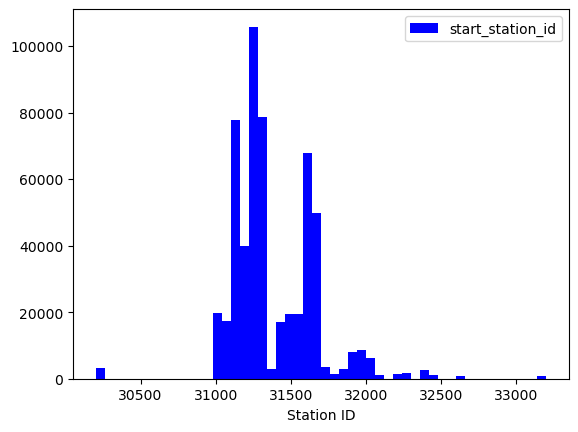

In [20]:
label = 'start_station_id'
plt.hist(bike_data[label] , bins=50, color='blue', label='start_station_id')
plt.xlabel('Station ID')
plt.legend()
plt.show()



  #    Aggregated dataframe bike_data

In [21]:
# Using aggregated data frame by using groupby fuction
demand_data = bike_data.groupby(['start_station_id', 'hour', 'day_of_week', 'month','start_lat',	'start_lng']).size().reset_index(name='station_demand')   # .size() - counts the number of rows in each group
demand_data.shape

(112304, 7)

In [22]:
demand_data

,start_station_id,hour,day_of_week,month,start_lat,start_lng,station_demand
0,30200.0,0,0,10,38.894280,-77.023979,1
1,30200.0,0,3,10,38.894280,-77.023979,1
2,30200.0,0,5,10,38.894266,-77.024273,1
3,30200.0,0,5,10,38.894280,-77.023979,1
4,30200.0,1,3,10,38.894280,-77.023979,1
...,...,...,...,...,...,...,...
112299,33200.0,23,1,10,38.896604,-77.039778,2
112300,33200.0,23,2,10,38.896604,-77.039778,2
112301,33200.0,23,4,10,38.896604,-77.039778,3
112302,33200.0,23,5,10,38.896604,-77.039778,3


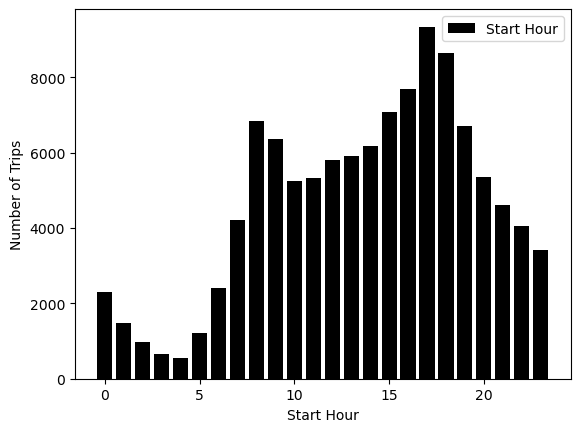

In [23]:
# This will sort by hour (0-23) 
hour_counts = demand_data['hour'].value_counts().sort_index()
plt.bar(hour_counts.index, hour_counts.values, label='Start Hour', color='black') # Trip/ hour
plt.xlabel('Start Hour')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()


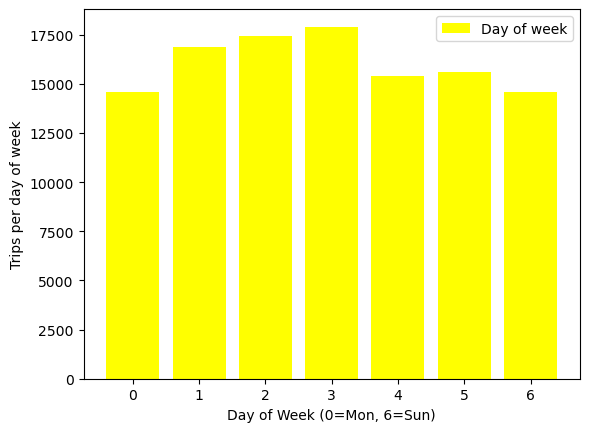

In [24]:
# This will sort by hour (0-23) 
hour_counts = demand_data['day_of_week'].value_counts().sort_index()
plt.bar(hour_counts.index, hour_counts.values, label='Day of week', color='yellow') # Trip/ hour
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Trips per day of week')
plt.legend()
plt.show()


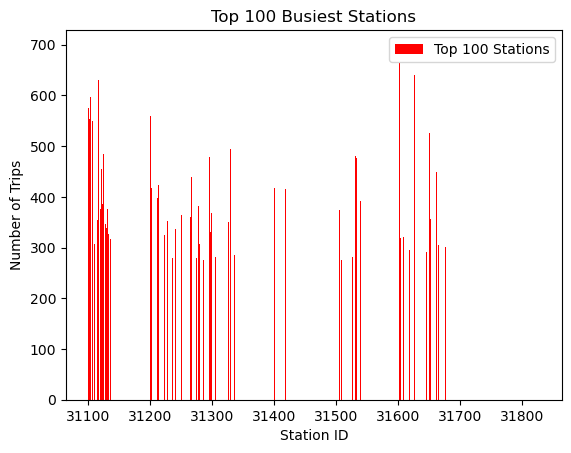

In [25]:
# Top 10 busiest stations
station_counts = demand_data['start_station_id'].value_counts().head(100)
plt.bar(station_counts.index, station_counts.values, label='Top 100 Stations',color='red')
plt.xlabel('Station ID')
plt.ylabel('Number of Trips')
plt.title('Top 100 Busiest Stations')
plt.legend()
plt.show()

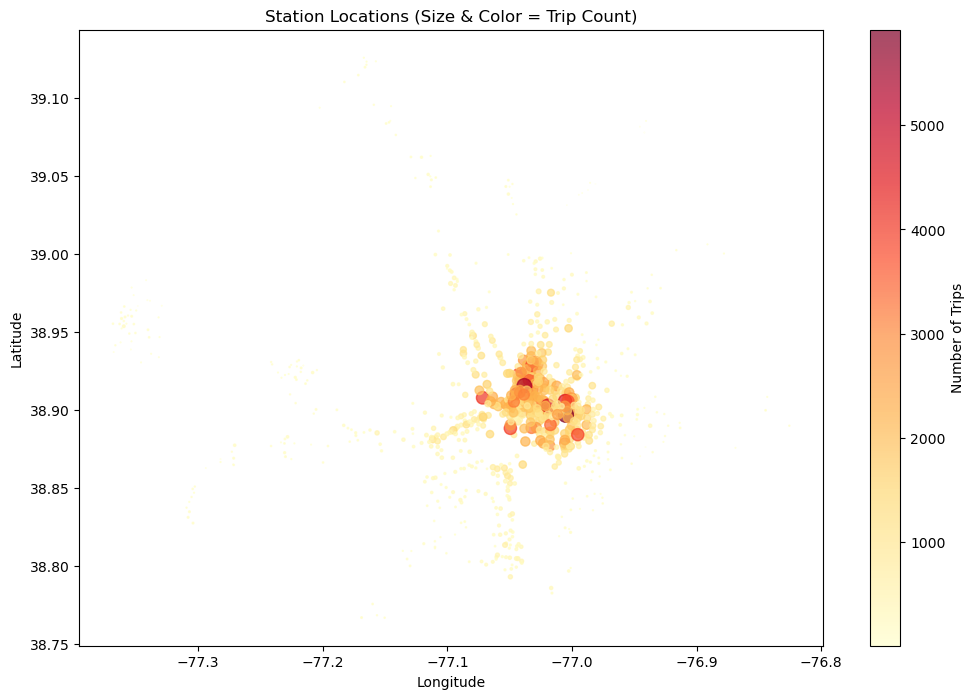

In [26]:
# unique stations with their coordinates and trip counts
station_geo = bike_data.groupby('start_station_id').agg({
    'start_lat': 'first',
    'start_lng': 'first'
}).reset_index()

# Add trip count separately
station_geo['trip_count'] = bike_data.groupby('start_station_id').size().values

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(station_geo['start_lng'], station_geo['start_lat'], 
           s=station_geo['trip_count']/50,  # Size based on trip count
           c=station_geo['trip_count'],     # Color based on trip count
           cmap='YlOrRd', alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Station Locations (Size & Color = Trip Count)')
plt.colorbar(label='Number of Trips')
plt.show()

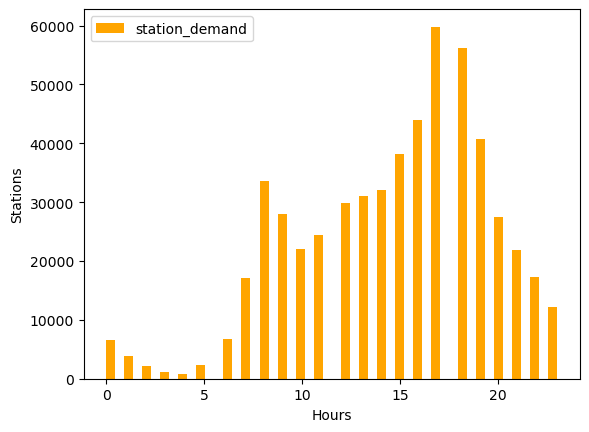

In [27]:
# ploting station demand
plt.hist(bike_data['hour'] , bins=50, color='orange', label='station_demand')
plt.xlabel('Hours')
plt.ylabel('Stations')
plt.legend()
plt.show()


## Demand Patterns

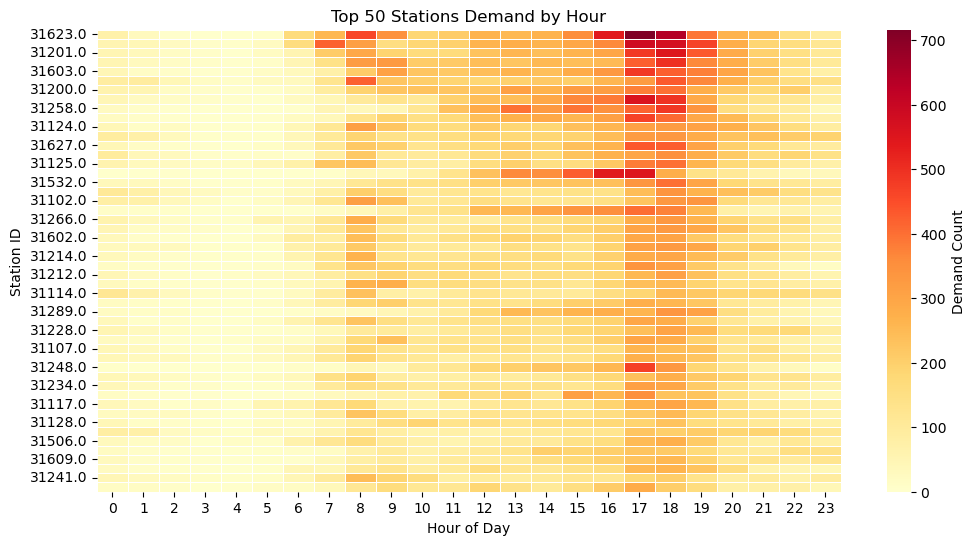

In [28]:
# Used aggfunc='sum' in the pivot table to aggregate demand counts
#  creating a proper pivot table with station IDs as rows, hours as columns, and sum of demand as values
heatmap_data = demand_data.pivot_table(
    index='start_station_id', 
    columns='hour', 
    values='station_demand', 
    aggfunc='sum',  # Using sum to aggregate demand 
    fill_value=0
)

# For better visualization, taking the top N stations by total demand
top_stations = demand_data.groupby('start_station_id')['station_demand'].sum().nlargest(50).index
heatmap_data_top = heatmap_data.loc[top_stations]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_top, annot=False, cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Demand Count'})
plt.title('Top 50 Stations Demand by Hour')  
plt.xlabel('Hour of Day')  
plt.ylabel('Station ID')
plt.show()

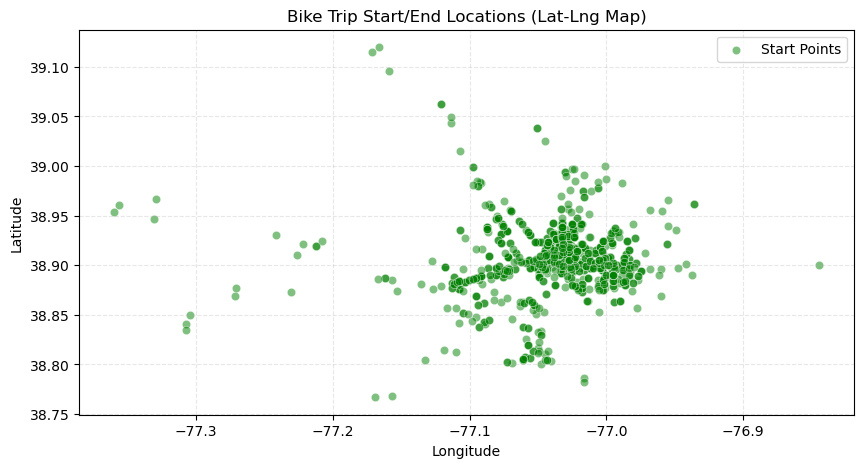

In [29]:
plt.figure(figsize=(10, 5))

# Scatter plot of start locations
sns.scatterplot(x='start_lng', y='start_lat', data=demand_data.sample(1000),alpha=0.5,color='green',label='Start Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Trip Start/End Locations (Lat-Lng Map)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Training a model By using  Randomforest Regression Algorithm

In [30]:
# Separate features and labels # using 2D [[]] for Ml traing even if one future

X,y = demand_data[['start_station_id',	'hour',	'day_of_week',	'month',	'start_lat',	'start_lng']] , demand_data['station_demand']
print('Futures:',X[:10], '\nLabel:',y[:10],sep='\n')
print('X shape',X.shape)
print('y shape',y.shape)


Futures:
   start_station_id  hour  day_of_week  month  start_lat  start_lng
0           30200.0     0            0     10  38.894280 -77.023979
1           30200.0     0            3     10  38.894280 -77.023979
2           30200.0     0            5     10  38.894266 -77.024273
3           30200.0     0            5     10  38.894280 -77.023979
4           30200.0     1            3     10  38.894280 -77.023979
5           30200.0     1            4     10  38.894280 -77.023979
6           30200.0     1            5     10  38.894280 -77.023979
7           30200.0     2            5     10  38.894280 -77.023979
8           30200.0     2            6     10  38.894280 -77.023979
9           30200.0     5            0     10  38.894280 -77.023979

Label:
0    1
1    1
2    1
3    1
4    1
5    3
6    1
7    1
8    1
9    1
Name: station_demand, dtype: int64
X shape (112304, 6)
y shape (112304,)


In [31]:
# Split datasets for training and testing set
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print('Training Set: %d rows\ntest Set: %d rows' %(X_train.shape[0],X_test.shape[0])) 

Training Set: 78612 rows
test Set: 33692 rows


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")


RandomForestRegressor() 



# Evaluating Model Performance with Plots

In [41]:
# Evaluating Model using Testing data
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted values:', np.round(predictions)[:50])
print('Actual Values:',np.round(y_test)[:50])

Predicted values: [ 2.  1.  2.  1.  3.  2.  1.  3.  4.  1. 33.  6.  3.  4.  1.  4. 18.  1.
  1.  1.  1.  1.  2.  2. 11.  9.  1.  2.  2.  3. 27.  5.  2.  7.  2.  1.
  4.  2.  1.  2.  2.  6.  3.  5.  2.  1.  1.  1.  2.  1.]
Actual Values: 52208      3
53388      1
52206      1
70247      3
42288      1
7576       2
97155      1
54420      1
36941      7
17639      1
50337     32
48567     16
16241      1
48927      7
70438      1
90447      8
16129     14
39672      1
71574      1
20014      1
65767      1
19731      1
9221       1
6649       1
37671      1
54662      6
63799      1
84835      1
62046      1
61422      4
21350     19
33921      5
104967     2
40315     10
10669      1
95610      1
52783      6
67929      1
65177      1
59358      2
76867      1
78757      1
8857       1
105106     1
60375      7
15322      1
42327      1
66466      1
109075     1
43961      1
Name: station_demand, dtype: int64


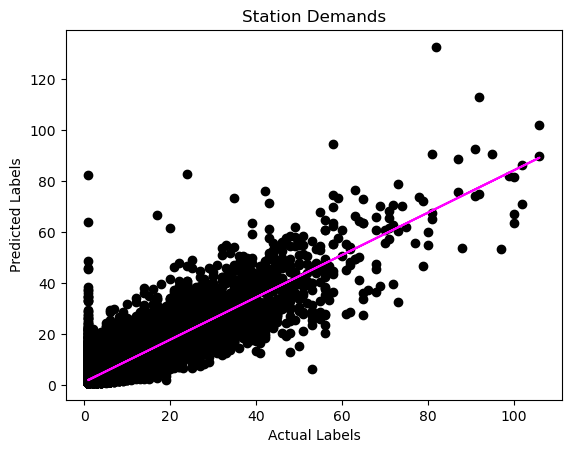

In [34]:
# ploting the trained model

plt.scatter(y_test , predictions , color='black')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Station Demands')

# overlay the regression line
t = np.polyfit(y_test , predictions, 1)
z = np.poly1d(t)
plt.plot(y_test,z(y_test), color='magenta')
plt.show()



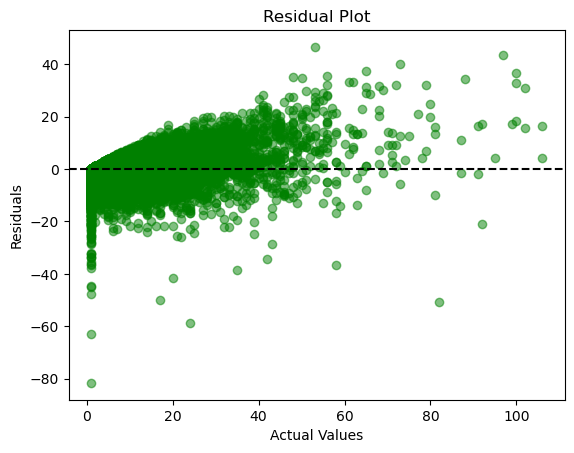

In [35]:
## Residuals plot shows the difference between actual and predicted values 

residuals = y_test - predictions
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### calculating metrices

In [36]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions))
print("MAE:", mean_absolute_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

R²: 0.7774446651814595
MAE: 2.0480428001843025
RMSE: 3.8878493762374973
